# Predictive Analysis using Machine Learning
CodTech Internship – Task 2

Dataset: Spotify Analysis Dataset

Objective:
To predict song popularity using audio features
such as danceability, energy, tempo, and valence.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore")



In [3]:
df = pd.read_csv("spotify_analysis_dataset.csv")
df.head()


,track_id,track_name,artist,album,release_date,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,TRK1000,Song 0,Artist 7,Album 3,2010-01-01,240151,70,0.037,0.349,-2.87,0.522,0.616,0.931,0.947,0.353,110.14
1,TRK1001,Song 1,Artist 4,Album 5,2010-01-02,253767,58,0.610,0.726,-22.87,0.770,0.635,0.858,0.986,0.584,75.90
2,TRK1002,Song 2,Artist 13,Album 19,2010-01-03,244375,85,0.503,0.897,-1.33,0.216,0.045,0.429,0.753,0.078,154.02
3,TRK1003,Song 3,Artist 11,Album 7,2010-01-04,299262,27,0.051,0.887,-1.46,0.623,0.375,0.751,0.376,0.974,132.84
4,TRK1004,Song 4,Artist 8,Album 9,2010-01-05,256330,65,0.279,0.780,-5.88,0.085,0.626,0.755,0.084,0.986,168.12


In [9]:
df.describe()


,duration_ms,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,212726.100000,50.320000,0.47420,0.506000,-17.696000,0.455460,0.496620,0.517740,0.529320,0.607080,126.094000
std,47725.482111,27.528419,0.29023,0.299962,11.567047,0.278252,0.304199,0.311123,0.321099,0.305826,39.179744
min,128392.000000,0.000000,0.01700,0.005000,-38.780000,0.014000,0.018000,0.011000,0.011000,0.026000,62.040000
25%,170575.250000,27.500000,0.23850,0.238750,-26.265000,0.224000,0.217500,0.299500,0.278000,0.377250,90.762500
50%,227562.500000,55.500000,0.50750,0.572500,-17.035000,0.473500,0.560500,0.527500,0.541000,0.645000,126.590000
75%,246702.250000,69.750000,0.67650,0.725000,-7.607500,0.687000,0.747000,0.791500,0.846000,0.861250,152.945000
max,299262.000000,96.000000,0.98600,0.973000,-0.400000,0.976000,0.991000,0.987000,0.993000,1.000000,197.200000


In [10]:
df.shape


(50, 16)

## Feature Selection
Audio features are used to predict song popularity.


In [4]:
features = [
    "danceability",
    "energy",
    "loudness",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo"
]

X = df[features]
y = df["popularity"]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [6]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [7]:
y_pred = model.predict(X_test)

print("Model Evaluation Metrics:")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


Model Evaluation Metrics:
MAE: 26.165871331670058
RMSE: 31.327046513383117
R2 Score: 0.253070010996606


## Exploratory Data Analysis
We explore relationships between key audio features and song popularity.


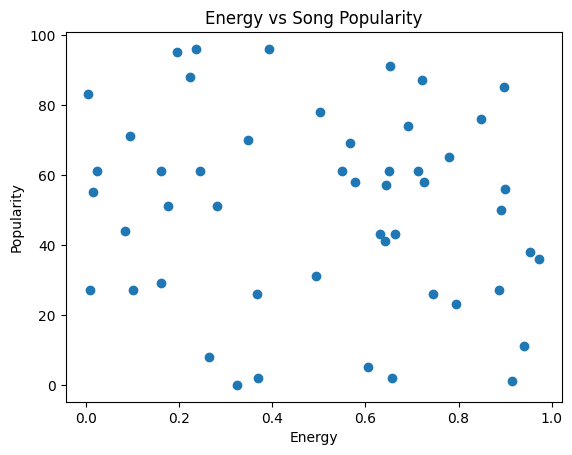

In [11]:
plt.figure()
plt.scatter(df["energy"], df["popularity"])
plt.xlabel("Energy")
plt.ylabel("Popularity")
plt.title("Energy vs Song Popularity")
plt.show()


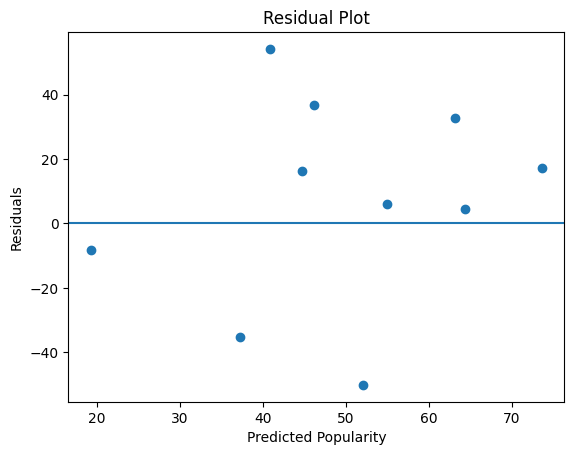

In [13]:
residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(0)
plt.xlabel("Predicted Popularity")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


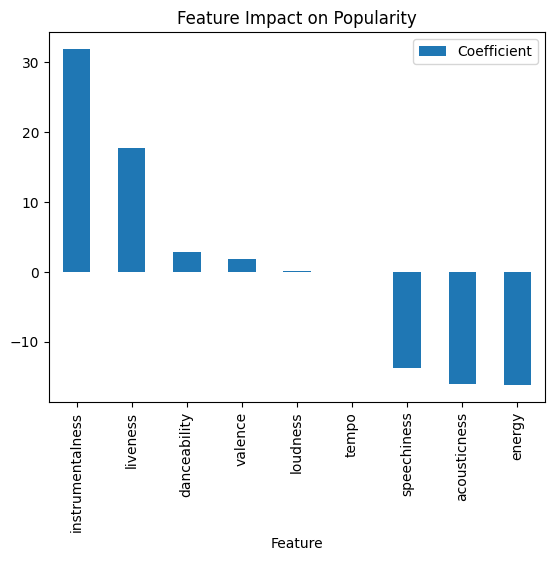

In [14]:
importance = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

importance.plot(
    x="Feature",
    y="Coefficient",
    kind="bar",
    title="Feature Impact on Popularity"
)
plt.show()


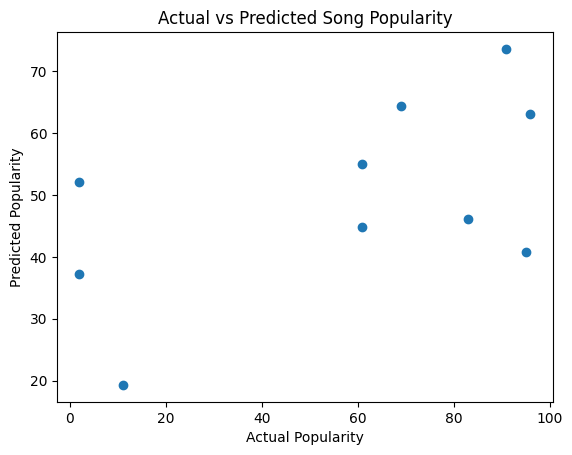

In [8]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Song Popularity")
plt.show()


In [15]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 981.3838432516692
R2 Score: 0.253070010996606


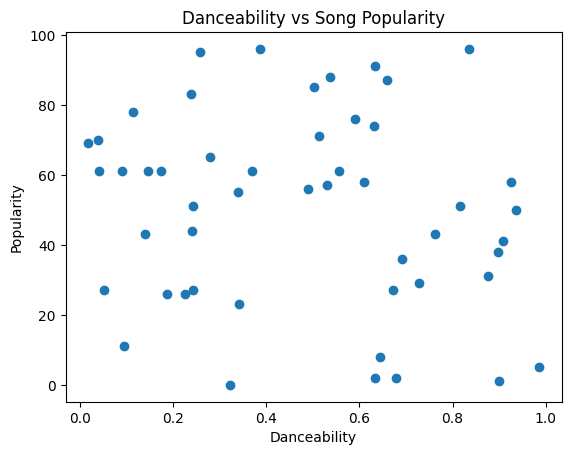

In [12]:
plt.figure()
plt.scatter(df["danceability"], df["popularity"])
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.title("Danceability vs Song Popularity")
plt.show()


## Conclusion

- A regression model was built to predict song popularity.
- Audio features such as energy, loudness, and danceability influence predictions.
- Model performance was evaluated using MSE and R² score.
- This demonstrates predictive analysis using machine learning.
